In [1]:
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

D:\Anaconda\envs\py3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print(tf.__version__)

1.12.0


In [3]:
imdb = keras.datasets.imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [4]:
print("lenth of train data and labels:{}&{}".format(len(train_data),len(train_labels)))

lenth of train data and labels:25000&25000


In [5]:
len(train_data[0])

218

In [6]:
train_labels[0]

1

In [7]:
word_index = imdb.get_word_index()

word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = {k:v for v,k in word_index.items()}

In [8]:
def decode(li):
    return ' '.join(reverse_word_index.get(i,'?') for i in li)

In [9]:
a=decode(train_data[0])

In [10]:
a

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [11]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       padding = 'post',
                                                       maxlen = 256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,padding='post',maxlen= 256)

In [12]:
len(train_data[0]),len(test_data[0])

(256, 256)

In [13]:
train_data[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [14]:
from keras import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense

In [15]:
model1 = Sequential()
model1.add(Embedding(10000,16))
model1.add(keras.layers.GlobalAveragePooling1D())
model1.add(Dense(16,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [16]:
from keras.layers import Dropout
from keras.regularizers import l1,l2

In [17]:
model2 = Sequential()
model2.add(Embedding(10000,16))
model2.add(keras.layers.GlobalAveragePooling1D())
model2.add(Dense(16,kernel_regularizer=l1(0.01),activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [18]:
model3 = Sequential()
model3.add(Embedding(10000,16))
model3.add(keras.layers.GlobalAveragePooling1D())
model3.add(Dropout(0.5))
model3.add(Dense(16,kernel_regularizer=l1(0.01),activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1,activation='sigmoid'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [19]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])

In [20]:
x_val = train_data[:10000]
x_train  = train_data[10000:]
y_val = train_labels[:10000]
y_train  = train_labels[10000:]

In [21]:
history1 = model1.fit(x_train,y_train,epochs=40,batch_size=256,validation_data=(x_val,y_val),verbose=1)
history2 = model2.fit(x_train,y_train,epochs=40,batch_size=256,validation_data=(x_val,y_val),verbose=1)
history3 = model3.fit(x_train,y_train,epochs=40,batch_size=256,validation_data=(x_val,y_val),verbose=2)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 77us/step - loss: 0.6897 - acc: 0.6374 - val_loss: 0.6839 - val_acc: 0.7188
Epoch 2/40
15000/15000 [==============================] - 1s 57us/step - loss: 0.6694 - acc: 0.7512 - val_loss: 0.6521 - val_acc: 0.7588
Epoch 3/40
15000/15000 [==============================] - 1s 55us/step - loss: 0.6174 - acc: 0.7901 - val_loss: 0.5870 - val_acc: 0.7972
Epoch 4/40
15000/15000 [==============================] - 1s 59us/step - loss: 0.5346 - acc: 0.8222 - val_loss: 0.5051 - val_acc: 0.8240
Epoch 5/40
15000/15000 [==============================] - 1s 64us/step - loss: 0.4478 - acc: 0.8551 - val_loss: 0.4328 - val_acc: 0.8457
Epoch 6/40
15000/15000 [==============================] - 1s 59us/step - loss: 0.3778 - acc: 0.8745 - val_loss: 0.3821 - val_acc: 0.8578
Epoch 7/40
15000/15000 [==============================] - 1s 55us/step - loss: 0.3277 - acc: 0.8877 - val_loss: 0.3489 - val_acc

Epoch 20/40
15000/15000 [==============================] - 1s 57us/step - loss: 0.4922 - acc: 0.8583 - val_loss: 0.5111 - val_acc: 0.8401
Epoch 21/40
15000/15000 [==============================] - 1s 54us/step - loss: 0.4744 - acc: 0.8673 - val_loss: 0.4975 - val_acc: 0.8476
Epoch 22/40
15000/15000 [==============================] - 1s 54us/step - loss: 0.4589 - acc: 0.8740 - val_loss: 0.4864 - val_acc: 0.8513
Epoch 23/40
15000/15000 [==============================] - 1s 51us/step - loss: 0.4463 - acc: 0.8809 - val_loss: 0.4773 - val_acc: 0.8566
Epoch 24/40
15000/15000 [==============================] - 1s 55us/step - loss: 0.4357 - acc: 0.8849 - val_loss: 0.4698 - val_acc: 0.8605
Epoch 25/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.4262 - acc: 0.8883 - val_loss: 0.4637 - val_acc: 0.8611
Epoch 26/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.4180 - acc: 0.8925 - val_loss: 0.4580 - val_acc: 0.8649
Epoch 27/40
15000/15000 [=========

result = model.evaluate(test_data,test_labels)
print(result)

history_dict = history.history
history_dict.keys()

In [22]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
val_loss1  = history1.history['val_loss']
loss1 = history1.history['loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
val_loss2  = history2.history['val_loss']
loss2 = history2.history['loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
val_loss3  = history3.history['val_loss']
loss3 = history3.history['loss']

In [24]:
epochs = range(1,len(acc2)+1,1)

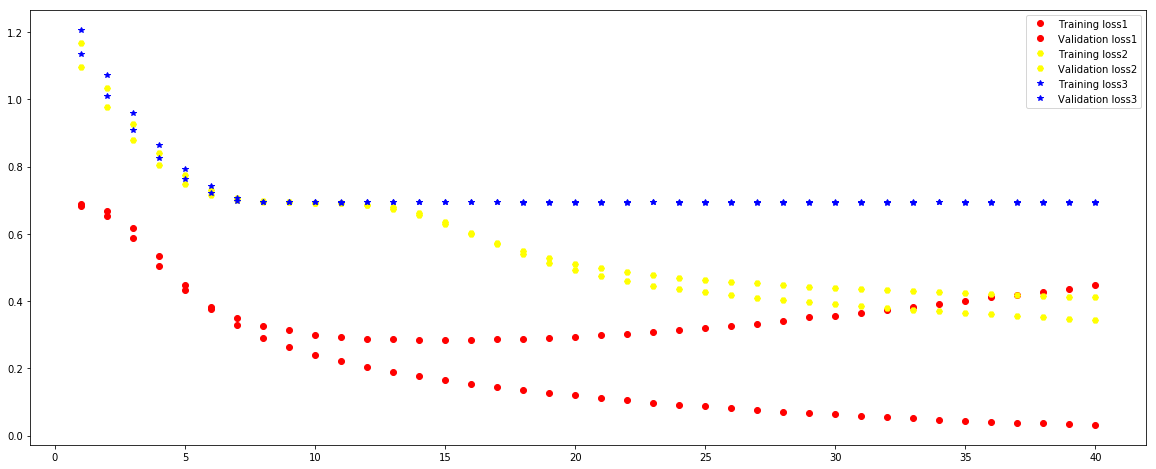

In [27]:
plt.figure(figsize=(20,8))
plt.plot(epochs, loss1, 'bo', label='Training loss1',color='red')
# b is for "solid blue line"
plt.plot(epochs, val_loss1, 'bo', label='Validation loss1',color='red')

plt.plot(epochs, loss2, 'H', label='Training loss2',color='yellow')
# b is for "solid blue line"
plt.plot(epochs, val_loss2, 'H', label='Validation loss2',color='yellow')

plt.plot(epochs, loss3, '*', label='Training loss3',color='blue')
# b is for "solid blue line"
plt.plot(epochs, val_loss3, '*', label='Validation loss3',color='blue')

plt.legend()
plt.show()

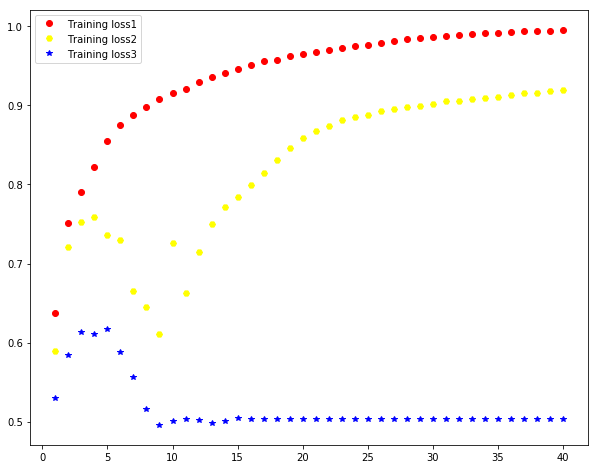

In [30]:
plt.figure(figsize=(10,8))
plt.plot(epochs, acc1, 'bo', label='Training loss1',color='red')
# b is for "solid blue line"
#plt.plot(epochs, val_acc1, 'bo', label='Validation loss1',color='red')

plt.plot(epochs, acc2, 'H', label='Training loss2',color='yellow')
# b is for "solid blue line"
#plt.plot(epochs, val_acc2, 'H', label='Validation loss2',color='yellow')

plt.plot(epochs, acc3, '*', label='Training loss3',color='blue')
# b is for "solid blue line"
#plt.plot(epochs, val_acc3, '*', label='Validation loss3',color='blue')

plt.legend()
plt.show()

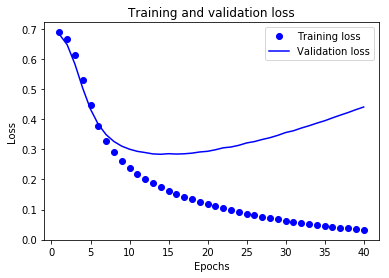

In [77]:

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()